# **PROJETO - ANÁLISE ESTATÍSTICA DE EXPECTATIVA DE VIDA**

FONTE: https://databank.worldbank.org/indicator/SP.DYN.LE00.IN/1ff4a498/Popular-Indicators#

## **CONECTAR COM O GOOGLE DRIVE PARA CAPTAR OS BANCOS DE DADOS**

In [1]:
# conecta o colab ao google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **IMPORTS DE BIBLIOTECAS**

###BIBLIOTECA DE ANÁLISE DE TEMPO DE EXECUÇÃO DO SCRIPT

In [2]:
# Cronometra o tempo de execução do programa

import time
start_script = time.time()

###BIBLIOTECAS RESTANTES

In [3]:
# Importa as bibliotecas necessárias

from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import normaltest
from scipy.stats import t
from scipy import stats


##**FUNÇÕES**

In [4]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=0, decimal='.')
  return df

In [5]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**CAPTAÇÃO DE DADOS**

In [6]:
bd_geral = '/content/drive/MyDrive/..Python_Codes/Projeto_Statistic_Analysis_01/'
bd_local = bd_geral + 'BD'
df = ler_csv('d9d3ffb1-daa6-4e67-a48f-a12aa3d2c776_Data.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Afghanistan,AFG,55.841,56.308,56.784,57.271,57.772,58.29,58.826,59.375,59.93,60.484,61.028,61.553,62.054,62.525,62.966,63.377
1,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Albania,ALB,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
2,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Algeria,DZA,70.64,71.116,71.605,72.101,72.594,73.072,73.521,73.936,74.311,74.644,74.938,75.199,75.436,75.661,75.878,76.09
3,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


## **TRATAMENTO DE DADOS**

In [7]:
try:
  df.drop('Series Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
  df.drop('Series Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
  df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
except:
  pass

# transposição
# df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização
# new_header = df.iloc[0]                                   #grab the first row for the header
# df = df[1:]                                               #take the data less the header row
# df.columns = new_header                                   #set the header row as the df header

# renomear colunas
df.columns = ['País', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

# Remove NaN:
df.replace('..', np.nan, inplace=True)
df = df[df['País'].notna()]
df.drop('País',  axis='columns', inplace=True)    # remove colunas desnecessárias

df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,55.841,56.308,56.784,57.271,57.772,58.29,58.826,59.375,59.93,60.484,61.028,61.553,62.054,62.525,62.966,63.377
1,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
2,70.64,71.116,71.605,72.101,72.594,73.072,73.521,73.936,74.311,74.644,74.938,75.199,75.436,75.661,75.878,76.09
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,76.619512195122,77.6219512195122,77.5219512195122,77.5219512195122,77.7731707317073,77.4219512195122,78.3243902439024,76.8634146341463,77.1634146341463,77.5146341463415,77.8658536585366,78.3170731707317,78.5170731707317,78.7170731707317,78.8682926829268,79.0170731707317
213,71.022,71.239,71.447,71.648,71.842,72.028,72.203,72.366,72.517,72.656,72.788,72.915,73.041,73.17,73.303,73.442
214,60.683,61.216,61.781,62.358,62.931,63.481,63.997,64.47,64.892,65.255,65.549,65.768,65.92,66.016,66.066,66.085
215,44,44.615,45.4,46.322,47.354,48.496,49.757,51.134,52.606,54.13,55.655,57.126,58.502,59.746,60.831,61.737


In [8]:
# passando os valores do datafame de 'string' para 'float':
df = df.astype(float)

### **REMOÇÃO DE OUTLIERS E DADOS FORA DA CURVA**

In [9]:
# AINDA NÃO PROJETADO

### RESUMO

In [10]:
# criação de dataframe de resumo dos dados:
lista_index = list(range(2000,2015+1))
lista_media = []
lista_dp = []
lista_num_amostras = []

for n in range(0, len(df.columns)):
  lista_media.append(df[df.columns[n]].mean())
  lista_dp.append(df[df.columns[n]].std())
  lista_num_amostras.append(df[df.columns[n]].count())

df_resumo = pd.DataFrame({'Ano': lista_index, 
                         'Média':lista_media, 
                         'Desvio Padrão': lista_dp,
                          'Amostras': lista_num_amostras})

df_resumo["Variabilidade (%)"] = 100*df_resumo['Desvio Padrão']/df_resumo['Média']

### TESTE DE NORMALIDADE

In [11]:
significancia = 0.05  # 95% de confiabilidade
lista_pvalor = []
lista_pvalor_bool = []

for n in df.columns:
  pvalor = normaltest(df[n].dropna())[1] # retorna a estatistica de teste e o p-valor (precisa remover os NaN)
  lista_pvalor.append(pvalor)
  if pvalor > significancia:
    lista_pvalor_bool.append('Sim')
  else:
    lista_pvalor_bool.append('Não')

df_resumo['p-Valor (normal test)'] = lista_pvalor
df_resumo['É Normal? (95% signif.)'] = lista_pvalor_bool
# df_resumo

### T-STUDENT

In [12]:
lista_tstudent = ['-']
lista_tcrit_2caudas = ['-']
lista_p_2caudas = ['-']
lista_tstudent_bool = ['-']

for n in range(1, len(df_resumo.index)):
  t = abs(df_resumo['Média'][n] - df_resumo['Média'][n-1]) / ((df_resumo['Desvio Padrão'][n]/df_resumo['Amostras'][n] + df_resumo['Desvio Padrão'][n-1]/df_resumo['Amostras'][n-1]) ** 0.5)

  lista_tstudent.append(t) # valor t
  lista_tcrit_2caudas.append(stats.t.ppf(q=0.975, df=12)) # t critico pra curva de 2 caudas
  pvalor = 2*(1-stats.t.cdf(x=t, df=12))  # p pra curva de 2 caudas
  lista_p_2caudas.append(pvalor) 
  if pvalor > significancia:
    lista_tstudent_bool.append('Não')
  else:
    lista_tstudent_bool.append('Sim')


df_resumo['Valor t'] = lista_tstudent
df_resumo['Valor t-crít'] = lista_tcrit_2caudas
df_resumo['Valor p (Comparação)'] = lista_p_2caudas
df_resumo['Expectativa de Vida Mudou? (95% signif.)'] = lista_tstudent_bool

### TESTE F

In [13]:
# AINDA NÃO FOI PROJETADO

##**RESULTADOS**

###**GERAÇÃO DE GRÁFICOS**


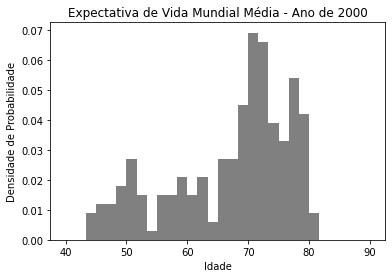

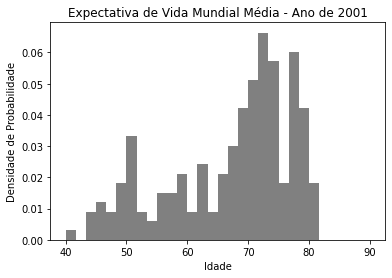

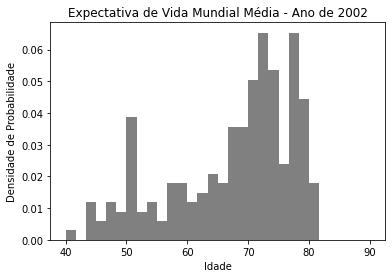

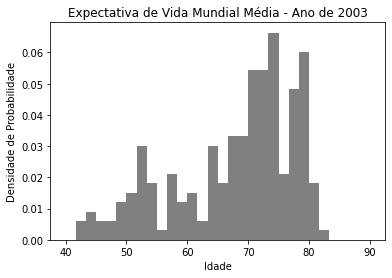

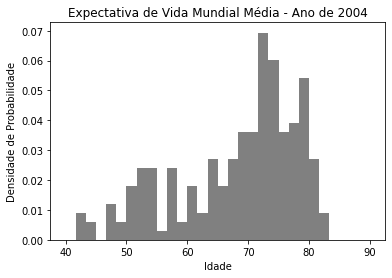

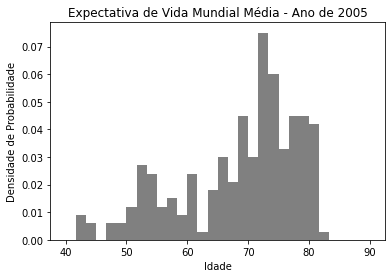

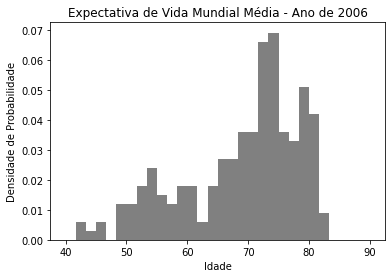

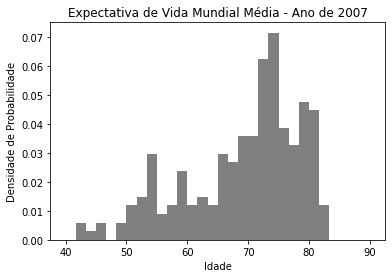

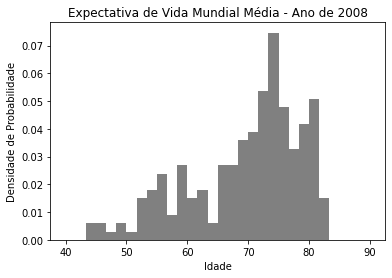

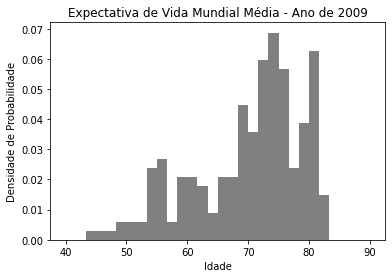

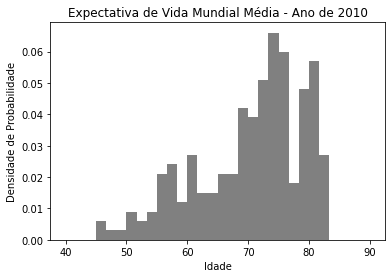

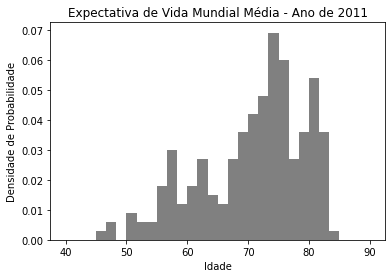

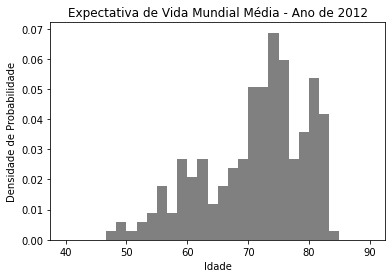

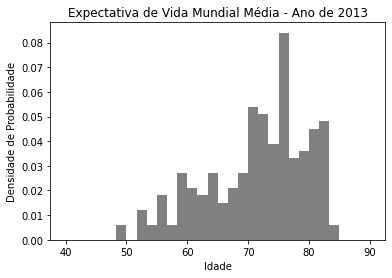

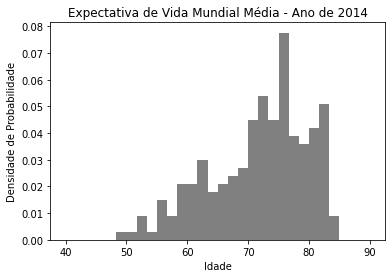

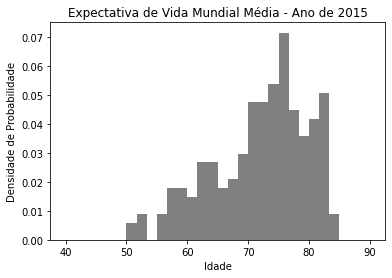

In [14]:
for i in df.columns:
  if i == 'País':
    pass
  else:
    fig, ax = plt.subplots()
    ax.hist(df[i], bins=30, density=True, color='gray',histtype = 'bar',range = (40, 90))

    ax.set_title("Expectativa de Vida Mundial Média - Ano de " + str(i))
    ax.set_ylabel('Densidade de Probabilidade')
    ax.set_xlabel('Idade')
    fig.savefig(bd_geral + "Imagens/histograma_expectativa_de_vida_anos_" + str(i) + ".png", dpi=300)  

###**GERAÇÃO DE TABELAS**

In [15]:
df_resumo

,Ano,Média,Desvio Padrão,Amostras,Variabilidade (%),p-Valor (normal test),É Normal? (95% signif.),Valor t,Valor t-crít,Valor p (Comparação),Expectativa de Vida Mudou? (95% signif.)
0,2000,67.005693,10.091237,201,15.060269,0.000039,Não,-,-,-,-
1,2001,67.298502,10.174293,199,15.118157,0.000042,Não,0.919837,2.178813,0.375779,Não
2,2002,67.657505,10.092499,202,14.917042,0.000035,Não,1.12913,2.178813,0.28091,Não
3,2003,67.828434,10.042258,199,14.805381,0.000048,Não,0.539377,2.178813,0.599492,Não
4,2004,68.205597,9.998906,199,14.659949,0.000064,Não,1.188485,2.178813,0.257631,Não
5,2005,68.500380,9.816476,200,14.330543,0.000067,Não,0.935334,2.178813,0.368058,Não
6,2006,68.887950,9.671922,200,14.040078,0.000078,Não,1.241586,2.178813,0.23811,Não
7,2007,69.264434,9.446060,201,13.637677,0.000075,Não,1.2192,2.178813,0.246192,Não
8,2008,69.649938,9.241530,201,13.268541,0.000096,Não,1.264302,2.178813,0.230127,Não
9,2009,70.039018,9.020295,201,12.878957,0.000117,Não,1.290816,2.178813,0.221082,Não


In [16]:
df_resumo.to_excel(bd_geral + "Planilhas/resumo.xlsx")  

## **FINALIZAÇÃO DO SCRIPT**

In [17]:
# Cronometra o tempo de execução do programa

end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 17.93 segundos
